In [1]:
#env Setup
import pandas as pd
import math

2. Given the following confusion matrix, evaluate (by hand) the model's performance.

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

- In the context of this problem, what is a false positive?
- In the context of this problem, what is a false negative?
- How would you describe this model?

In [2]:
# False Neg is predicting a dog when actually a cat
# False Pos is predicting a cat when actually a dog
tp = 34
tn = 46
fp = 7
fn = 13

In [3]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp/(tp+fp) 
recall = tp/(tp+fn)
f1 = (2* precision * recall)/(precision + recall)

In [4]:
print("accuracy is", accuracy)
print("recall is", round(recall,2))
print("precision is", round(precision,2))
print("f1 is", round(f1,2))

accuracy is 0.8
recall is 0.72
precision is 0.83
f1 is 0.77



3. You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

Use the predictions dataset and pandas to help answer the following questions:

- An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?
- Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [5]:
df = pd.read_csv('c3.csv')
df

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


Scope:
1. identify as many ducks that have a defect 
    - Find which model best predicts defects
    - Evaluation of Models

fp - Predicted good when defect present
fn - predicted defect when actually good

Costs:   fp - defect rub ducks are sent to customers
        fn - good ducks are eliminated for defects
 
 - Appropriate evaluation: Precision
 - Second part F1 would be appropriate evaluation as negative light and bad ducks are factors

In [6]:
df.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

In [29]:
subset = df[df.actual =='Defect']
subset

,actual,model1,model2,model3
13,Defect,No Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
74,Defect,No Defect,No Defect,Defect
87,Defect,No Defect,Defect,Defect
118,Defect,No Defect,Defect,No Defect
135,Defect,Defect,No Defect,Defect
140,Defect,No Defect,Defect,Defect
147,Defect,Defect,No Defect,Defect


In [30]:
# Recall Model 1
recall_ex1 = (subset.actual == subset.model1).mean()
print('Model 1')
print(f"Model recall: {recall_ex1:.2%}")

Model 1
Model recall: 50.00%


In [31]:
# Recall Model 2
recall_ex2 = (subset.actual == subset.model2).mean()
print('Model 2')
print(f"Model recall: {recall_ex2:.2%}")

Model 2
Model recall: 56.25%


In [32]:
# Recall Model 3
recall_ex3 = (subset.actual == subset.model3).mean()
print('Model 3')
print(f"Model recall: {recall_ex3:.2%}")

Model 3
Model recall: 81.25%


### Takeaway:
 - Model 3 is best reacll method to avoid false positives

In [33]:
# Precision
subset = df[df.model1=='Defect']
precision_m1 = (subset.actual == subset.model1).mean()
print("Model 1")
print(f"Model Precision:{precision_m1:.2%}")

Model 1
Model Precision:80.00%


In [34]:
# Precision
subset = df[df.model2=='Defect']
precision_m2 = (subset.actual == subset.model2).mean()
print("Model 2")
print(f"Model Precision:{precision_m2:.2%}")

Model 2
Model Precision:10.00%


In [35]:
# Precision
subset = df[df.model3=='Defect']
precision_m3 = (subset.actual == subset.model3).mean()
print("Model 3")
print(f"Model Precision:{precision_m3:.2%}")

Model 3
Model Precision:13.13%


### Precision takeaway:
 - Model 1 has highest precision for minimizing false positives

In [36]:
# f1 = (2* precision * recall)/(precision + recall)
# F1 for Model 1
f1_m1 = (2*precision_m1 * recall_ex1)/(precision_m1 + recall_ex1)
print(f"F1 for Model 1: {f1_m1:.2%}")

F1 for Model 1: 61.54%


In [37]:
# F1 for Model 2
f1_m2 = (2*precision_m2 * recall_ex2)/(precision_m2 + recall_ex2)
print(f"F1 for Model 2: {f1_m2:.2%}")

F1 for Model 2: 16.98%


In [38]:
# F1 for Model 3
f1_m3 = (2*precision_m3 * recall_ex3)/(precision_m3 + recall_ex3)
print(f"F1 for Model 1: {f1_m3:.2%}")

F1 for Model 1: 22.61%


### F1 Takeaway:
 - Model 1 is best for F1 analysis 

## Exercise 4
4. You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data, and you can find their results here.

Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

- A. In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?
- B. Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?
- C. Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?

In [39]:
paws = pd.read_csv('gives_you_paws.csv')
paws

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


In [45]:
paws.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [46]:
# Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:
paws["baseline"] = paws.actual.value_counts().idxmax()
paws.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


Dog is dominate picture, so basline is set to dog

In [48]:
# B. Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?
subset = paws[paws.actual == 'dog']
subset.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
8,dog,dog,cat,dog,dog,dog


### Scope
- positive = dog
- negative = cat

-- fp = predicted dog when cat actual
-- fn = predicted cat when dog actual

- phase 1 : error on more dogs - cost: missing positive case higher - Recall
- phase 2: error on less dogs - cost: acting on pos prediction high - precision

In [50]:
# Recall Models
rm1=(subset.actual == subset.model1).mean()
rm2=(subset.actual == subset.model2).mean()
rm3=(subset.actual == subset.model3).mean()
rm4=(subset.actual == subset.model4).mean()
rmb=(subset.actual == subset.baseline).mean()

In [52]:
print(f" Model 1 recall: {rm1:.2%}")
print(f" Model 2 recall: {rm2:.2%}")
print(f" Model 3 recall: {rm3:.2%}")
print(f" Model 4 recall: {rm4:.2%}")
print(f" Model baseline recall: {rmb:.2%}")

 Model 1 recall: 80.33%
 Model 2 recall: 49.08%
 Model 3 recall: 50.86%
 Model 4 recall: 95.57%
 Model baseline recall: 100.00%


### Take away Phase 1
 - Model 4 is best for recall

In [54]:
# Confusion Matrix Model4
pd.crosstab(paws.model4,paws.actual)

actual,cat,dog
model4,,
cat,603,144
dog,1143,3110


### Phase 2: Precision to minimize false positives

In [55]:
paws.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


In [56]:
# Building prediction subsets
subset1= paws[paws.model1 =='dog']
subset2= paws[paws.model2 =='dog']
subset3= paws[paws.model3 =='dog']
subset4= paws[paws.model4 =='dog']
subsetb= paws[paws.baseline =='dog']
subset1.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
7,cat,dog,cat,cat,dog,dog
8,dog,dog,cat,dog,dog,dog


In [57]:
# Precision
p1 = (subset1.actual == subset1.model1).mean()
p2 = (subset2.actual == subset2.model2).mean()
p3 = (subset3.actual == subset3.model3).mean()
p4 = (subset4.actual == subset4.model4).mean()
pb = (subsetb.actual == subsetb.baseline).mean()

In [59]:
print(f"Precision for Model 1: {p1:.2%}")
print(f"Precision for Model 2: {p2:.2%}")
print(f"Precision for Model 3: {p3:.2%}")
print(f"Precision for Model 4: {p4:.2%}")
print(f"Precision for Model Baseline: {pb:.2%}")

Precision for Model 1: 89.00%
Precision for Model 2: 89.32%
Precision for Model 3: 65.99%
Precision for Model 4: 73.12%
Precision for Model Baseline: 65.08%


### Takeaway: Model 2 has highest precision

In [60]:
# Crosstab:
pd.crosstab(paws.model2, paws.actual)

actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


## C. Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?
###  Cat Optimization: Scope
- positive = cat
- negative = dog

-- fp = predicted cat when dog actual
-- fn = predicted dog when cat actual

- phase 1 :  Recall
- phase 2:  precision

### Note - trying a different method using loops

In [61]:
# Defining elements
pos = 'cat'
models = paws.columns.to_list()
models.remove('actual')
accuracy = {}
precision = {}
recall = {}
f1 = {}

In [90]:
# Build Loop:
for model in models:
    # Accuracy
    model_accuracy = (paws[model]==paws.actual).mean()
    # Precision
    subset = paws[paws[model]==pos]
    model_precision = (subset[model]==subset.actual).mean()
    # Recall
    subset = paws[paws.actual == pos]
    model_recall = (subset[model]==subset.actual).mean()
    # F1
    model_f1 = (2*model_precision*model_recall)/(model_precision+model_recall)
    
    
    accuracy[model] = model_accuracy
    precision[model] = model_precision
    recall[model] = model_recall
    f1[model] = (2*precision[model]*recall[model])/(precision[model]+recall[model])
    
    print(model)
    print(f'   model accuracy: {model_accuracy:.2%}')
    print(f'   model recall: {model_recall:.2%}')
    print(f'   model precision: {model_precision:.2%}')
    print(f'   model f1: {model_f1:.2%}')

model1
   model accuracy: 80.74%
   model recall: 81.50%
   model precision: 68.98%
   model f1: 74.72%
model2
   model accuracy: 63.04%
   model recall: 89.06%
   model precision: 48.41%
   model f1: 62.73%
model3
   model accuracy: 50.96%
   model recall: 51.15%
   model precision: 35.83%
   model f1: 42.14%
model4
   model accuracy: 74.26%
   model recall: 34.54%
   model precision: 80.72%
   model f1: 48.38%
baseline
   model accuracy: 65.08%
   model recall: 0.00%
   model precision: nan%
   model f1: nan%


In [94]:
# See it in dataframe 
results = pd.DataFrame(data = [accuracy, precision, recall, f1], index = ['accuracy','precision','recall','f1'])
results

,model1,model2,model3,model4,baseline
accuracy,0.807400,0.630400,0.509600,0.742600,0.6508
precision,0.689772,0.484122,0.358347,0.807229,NaN
recall,0.815006,0.890607,0.511455,0.345361,0.0000
f1,0.747178,0.627269,0.421425,0.483755,NaN


### Takeaway
 - Phase 1: Recall =  Model2 is highest
 - Phase 2: Precision = Model 4 is highest
 - Accuracy = Model 1 is highest

Text(0.5, 1.0, 'M1 Best Overall')

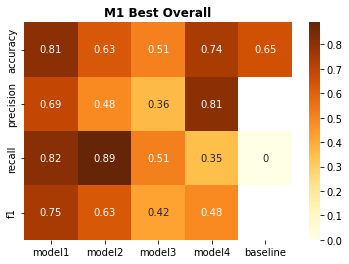

In [111]:
# visualization of data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
ax = plt.axes()
sns.heatmap(results,cmap='YlOrBr', annot = True)

ax.set_title('M1 Best Overall', fontweight = 'bold')

### Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.
- sklean.metrics.accuracy_score
- sklean.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_score

In [75]:
from sklearn.metrics import classification_report

In [72]:
# Defining elements
pos = 'cat'
models = paws.columns.to_list()
models.remove('actual')
accuracy = {}
precision = {}
recall = {}
f1 = {}

In [77]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [79]:
x = recall_score(paws.actual, paws.model1, pos_label='cat')
x

0.8150057273768614

In [81]:
y = accuracy_score(paws.actual,paws.model1)
y

0.8074

In [83]:
z=precision_score(paws.actual, paws.model1, pos_label = 'dog')
z

0.8900238338440586

In [76]:
# Classification model 1
x = classification_report(paws.actual, paws.model1, output_dict = True)
pd.DataFrame(x)

,cat,dog,accuracy,macro avg,weighted avg
precision,0.689772,0.890024,0.8074,0.789898,0.820096
recall,0.815006,0.803319,0.8074,0.809162,0.807400
f1-score,0.747178,0.844452,0.8074,0.795815,0.810484
support,1746.000000,3254.000000,0.8074,5000.000000,5000.000000


In [112]:
# Model variables  - Data frame of model 2
x = classification_report(paws.actual, paws.model1, output_dict = True)
y = classification_report(paws.actual, paws.model2, output_dict = True)
z = classification_report(paws.actual, paws.model3, output_dict = True)
a = classification_report(paws.actual, paws.model4, output_dict = True)
b = classification_report(paws.actual, paws.baseline, output_dict = True)
pd.DataFrame(y)


,cat,dog,accuracy,macro avg,weighted avg
precision,0.484122,0.893177,0.6304,0.688649,0.750335
recall,0.890607,0.490781,0.6304,0.690694,0.630400
f1-score,0.627269,0.633479,0.6304,0.630374,0.631310
support,1746.000000,3254.000000,0.6304,5000.000000,5000.000000


In [86]:
# Model 3
pd.DataFrame(z)

,cat,dog,accuracy,macro avg,weighted avg
precision,0.358347,0.659888,0.5096,0.509118,0.554590
recall,0.511455,0.508605,0.5096,0.510030,0.509600
f1-score,0.421425,0.574453,0.5096,0.497939,0.521016
support,1746.000000,3254.000000,0.5096,5000.000000,5000.000000


In [87]:
# Model 4
pd.DataFrame(a)

,cat,dog,accuracy,macro avg,weighted avg
precision,0.807229,0.731249,0.7426,0.769239,0.757781
recall,0.345361,0.955747,0.7426,0.650554,0.742600
f1-score,0.483755,0.828560,0.7426,0.656157,0.708154
support,1746.000000,3254.000000,0.7426,5000.000000,5000.000000


In [88]:
# Baseline
pd.DataFrame(b)

,cat,dog,accuracy,macro avg,weighted avg
precision,0.0,0.650800,0.6508,0.325400,0.423541
recall,0.0,1.000000,0.6508,0.500000,0.650800
f1-score,0.0,0.788466,0.6508,0.394233,0.513134
support,1746.0,3254.000000,0.6508,5000.000000,5000.000000
